In [26]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [28]:
#loading dataset using pandas
df = pd.read_csv(r"C:\Users\rk73i\OneDrive\Desktop\internship_shadowfox\delhiaqi.csv")

In [33]:
#Initial Inspection
# View first few records
print("\n* First 5 Rows:")
print(df.head())

# Overview of dataset structure
print("\n* Dataset Info:")
print(df.info())

# Statistical summary
print("\n* Statistical Summary:")
print(df.describe())

# View all column names
print("\n* Column Names:", df.columns.tolist())



* First 5 Rows:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  

* Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    fl

In [34]:
# 4. Data Cleaning
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid/missing dates
df.dropna(subset=['date'], inplace=True)

# Extract year and month for time-based analysis
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

# Function to assign season based on month
def assign_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Summer'
    elif month in [6, 7, 8]: return 'Monsoon'
    else: return 'Post-Monsoon'

# Apply season function
df['Season'] = df['Month'].apply(assign_season)

# Creating AQI Column (Average of Key Pollutants)
df['AQI'] = df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']].mean(axis=1)


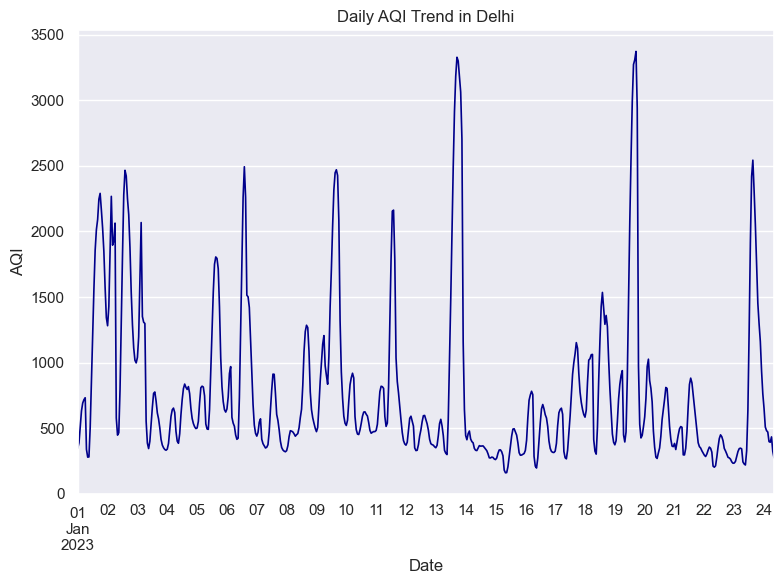

In [43]:
# 5. Exploratory Data Analysis (EDA)
# AQI Line Plot by Day (More granular view)
daily_aqi = df.groupby('date')['AQI'].mean()
plt.figure(figsize=(8, 6))
daily_aqi.plot(linewidth=1.2, color='darkblue')
plt.title('Daily AQI Trend in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

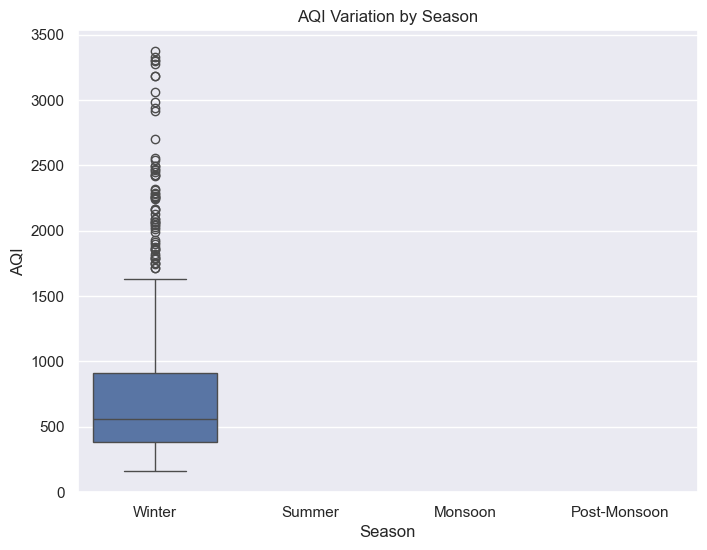

In [45]:
# Seasonal variation of AQI
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='AQI', data=df, order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])
plt.title('AQI Variation by Season')
plt.show()

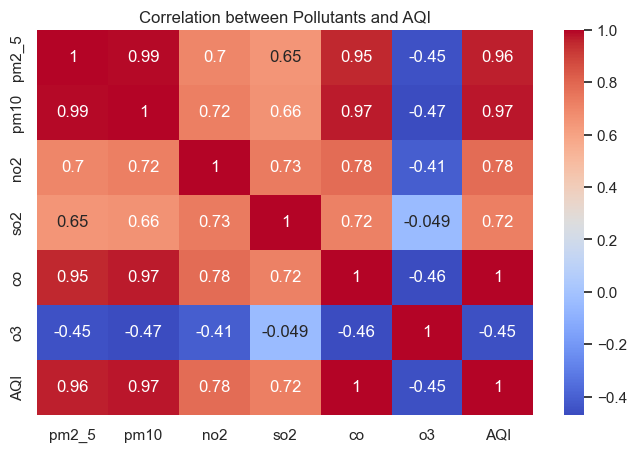

In [41]:
# Correlation heatmap of pollutants
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'AQI']
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutants and AQI')
plt.show()

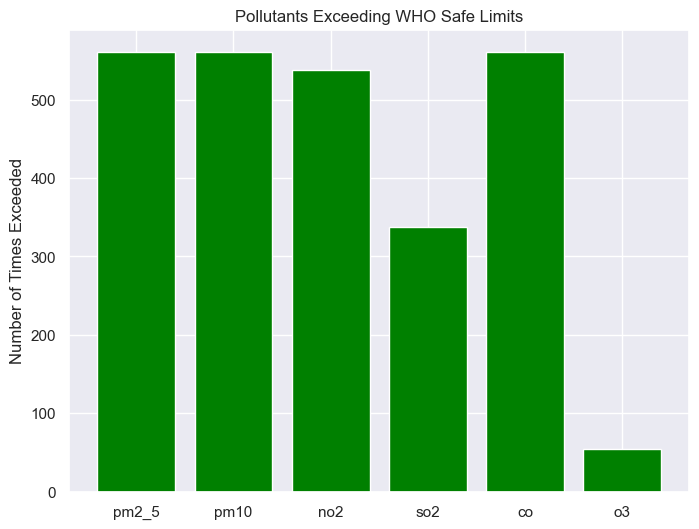

In [48]:
# WHO safe pollutant limits
who_limits = {
    'pm2_5': 15,
    'pm10': 45,
    'no2': 25,
    'so2': 40,
    'co': 4.0,
    'o3': 100
}

# Count how often each pollutant exceeds WHO limit
exceed_counts = {}
for pollutant, limit in who_limits.items():
    exceed_counts[pollutant] = (df[pollutant] > limit).sum()

# Plot exceedances
plt.figure(figsize=(8, 6))
plt.bar(exceed_counts.keys(), exceed_counts.values(), color='green')
plt.title('Pollutants Exceeding WHO Safe Limits')
plt.ylabel('Number of Times Exceeded')
plt.show()

In [50]:
# 6. Insight Generation
# Season-wise AQI
print("\nAverage AQI by Season:")
top_season = df.groupby('Season')['AQI'].mean().sort_values(ascending=False)
print(top_season)


Average AQI by Season:
Season
Winter    794.046227
Name: AQI, dtype: float64


In [57]:
# 7. Answers to Research Questions
print("\nQ1: Which pollutants most frequently exceed their WHO safe limits?")
print(pd.Series(exceed_counts).sort_values(ascending=False))

print("\nQ2: How does the AQI vary across different seasons?")
print(top_season)

print("\nQ3: What is the trend of AQI levels over recent years?")
yearly_aqi = df.groupby('Year')['AQI'].mean()
print(yearly_aqi)

print("\nQ4: How does AQI vary across different months?")
# Group and sort by monthly average AQI
monthly_aqi = df.groupby('Month')['AQI'].mean().sort_index()
# display results with month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
print("\nAverage AQI by Month:")
for month, value in monthly_aqi.items():
    print(f"{month_names[month]}: {value:.2f}")
worst_month = monthly_aqi.idxmax()
print(f"\nMonth with highest average AQI: {month_names[worst_month]} ({monthly_aqi[worst_month]:.2f})")

print("\nQ: Which pollutant has the strongest relationship with AQI in Delhi?")
# List of available pollutant columns
available_pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']
# Calculate correlations with AQI
pollutant_correlations = df[available_pollutants + ['AQI']].corr()['AQI'].drop('AQI')
# Print correlation values
print(pollutant_correlations.sort_values(ascending=False))


Q1: Which pollutants most frequently exceed their WHO safe limits?
pm2_5    561
pm10     561
co       561
no2      538
so2      337
o3        55
dtype: int64

Q2: How does the AQI vary across different seasons?
Season
Winter    794.046227
Name: AQI, dtype: float64

Q3: What is the trend of AQI levels over recent years?
Year
2023    794.046227
Name: AQI, dtype: float64

Q4: How does AQI vary across different months?

Average AQI by Month:
Jan: 794.05

Month with highest average AQI: Jan (794.05)

Q: Which pollutant has the strongest relationship with AQI in Delhi?
co       0.999288
pm10     0.974070
pm2_5    0.962048
no2      0.778021
so2      0.724650
o3      -0.452414
Name: AQI, dtype: float64


In [58]:
# 8. Final Recommendations
print("\n Recommendations:")
print("1. Focus pollution control efforts in winter when AQI is highest.")
print("2. Target PM2.5 and PM10 reduction strategies (e.g., stubble burning control, emission norms).")
print("3. Raise public awareness during high-risk months and encourage protective measures.")
print("4. Strengthen real-time monitoring where WHO limits are frequently exceeded.")
print("5. Invest in clean energy, public transport, and long-term environmental planning.")


 Recommendations:
1. Focus pollution control efforts in winter when AQI is highest.
2. Target PM2.5 and PM10 reduction strategies (e.g., stubble burning control, emission norms).
3. Raise public awareness during high-risk months and encourage protective measures.
4. Strengthen real-time monitoring where WHO limits are frequently exceeded.
5. Invest in clean energy, public transport, and long-term environmental planning.
